### **Data Pull from MySQL Database**

In [2]:
import pandas as pd
import os
from dotenv import load_dotenv
from sqlalchemy import create_engine

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
load_dotenv()

True

In [4]:
# Fetch credentials and connection info from environment
user = os.getenv("MYSQL_USER")
password = os.getenv("MYSQL_PASSWORD")
host = os.getenv("MYSQL_HOST", "127.0.0.1")
port = int(os.getenv("MYSQL_PORT", "3306"))
database = os.getenv("MYSQL_DATABASE")

# Create SQLAlchemy engine
connection_url = f"mysql+pymysql://{user}:{password}@{host}:{port}/{database}"
engine = create_engine(connection_url)

In [5]:
# Define your query
query = "SELECT * FROM banking_data"

# Read data into DataFrame
with engine.connect() as conn:
    df = pd.read_sql(query, conn)

# Display result
print("Connected to database:", database)

Connected to database: analysisfinancial


In [6]:
df.head()

,Client ID,Name,Age,Location ID,Joined Bank,Banking Contact,Nationality,Occupation,Fee Structure,Loyalty Classification,Estimated Income,Superannuation Savings,Amount of Credit Cards,Credit Card Balance,Bank Loans,Bank Deposits,Checking Accounts,Saving Accounts,Foreign Currency Account,Business Lending,Properties Owned,Risk Weighting,Gender,Investment Advisor,Banking Relationship
0,IND81288,Raymond Mills,24,34324,06-05-2019,Anthony Torres,American,Safety Technician IV,High,Jade,75384.77,17677.95,1,484.54,776242.92,1485828.64,603617.88,607332.46,12249.96,1134475.30,1,2,Male,Victor Dean,Retail
1,IND65833,Julia Spencer,23,42205,10-12-2001,Jonathan Hawkins,African,Software Consultant,High,Jade,289834.31,17398.92,1,2256.88,1270615.43,641482.79,229521.37,344635.16,61162.31,2000526.10,1,3,Male,Jeremy Porter,Institutional
2,IND47499,Stephen Murray,27,7314,25-01-2010,Anthony Berry,European,Help Desk Operator,High,Gold,169935.23,42825.90,2,4568.74,1052715.84,1033401.59,652674.69,203054.35,79071.78,548137.58,1,3,Female,Ernest Knight,Private Bank
3,IND72498,Virginia Garza,40,34594,28-03-2019,Steve Diaz,American,Geologist II,Mid,Silver,356808.11,5473.15,2,4205.00,121195.06,1048157.49,1048157.49,234685.02,57513.65,1148402.29,0,4,Male,Eric Shaw,Commercial
4,IND60181,Melissa Sanders,46,41269,20-07-2012,Shawn Long,American,Assistant Professor,Mid,Platinum,130711.68,48077.60,1,3779.49,1048301.95,487782.53,446644.25,128351.45,30012.14,1674412.12,0,3,Female,Kevin Kim,Retail


In [7]:
df.shape

(3000, 25)

### **Data Cleaning and Transformation**

In [8]:
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Client ID                 3000 non-null   object 
 1   Name                      3000 non-null   object 
 2   Age                       3000 non-null   int64  
 3   Location ID               3000 non-null   int64  
 4   Joined Bank               3000 non-null   object 
 5   Banking Contact           3000 non-null   object 
 6   Nationality               3000 non-null   object 
 7   Occupation                3000 non-null   object 
 8   Fee Structure             3000 non-null   object 
 9   Loyalty Classification    3000 non-null   object 
 10  Estimated Income          3000 non-null   float64
 11  Superannuation Savings    3000 non-null   float64
 12  Amount of Credit Cards    3000 non-null   int64  
 13  Credit Card Balance       3000 non-null   float64
 14  Bank Loa

In [10]:
df.duplicated().sum()

np.int64(0)

In [11]:
# Getting descriptive stats of the dataframe

df.describe().round(2)

,Age,Location ID,Estimated Income,Superannuation Savings,Amount of Credit Cards,Credit Card Balance,Bank Loans,Bank Deposits,Checking Accounts,Saving Accounts,Foreign Currency Account,Business Lending,Properties Owned,Risk Weighting
count,3000.00,3000.00,3000.00,3000.00,3000.00,3000.00,3000.00,3000.00,3000.00,3000.00,3000.00,3000.00,3000.00,3000.00
mean,51.04,21563.32,171305.03,25531.60,1.46,3176.21,591386.16,671560.19,321092.95,232908.35,29883.53,866759.81,1.52,2.25
std,19.85,12462.27,111935.81,16259.95,0.68,2497.09,457557.04,645716.86,282079.55,230007.78,23109.92,641230.32,1.10,1.13
min,17.00,12.00,15919.48,1482.03,1.00,1.17,0.00,0.00,0.00,0.00,45.00,0.00,0.00,1.00
25%,34.00,10803.50,82906.60,12513.78,1.00,1236.63,239628.14,204400.38,119947.53,74794.40,11916.54,374825.14,1.00,1.00
50%,51.00,21129.50,142313.48,22357.36,1.00,2560.81,479793.40,463316.46,242815.66,164086.56,24341.19,711314.66,2.00,2.00
75%,69.00,32054.50,242290.30,35464.74,2.00,4522.63,825813.04,942754.63,434874.94,315575.00,41966.39,1185110.08,2.00,3.00
max,85.00,43369.00,522330.26,75963.90,3.00,13991.99,2667556.66,3890598.08,1969923.08,1724118.36,124704.87,3825961.94,3.00,5.00


In [12]:
print(list(df.columns))

['Client ID', 'Name', 'Age', 'Location ID', 'Joined Bank', 'Banking Contact', 'Nationality', 'Occupation', 'Fee Structure', 'Loyalty Classification', 'Estimated Income', 'Superannuation Savings', 'Amount of Credit Cards', 'Credit Card Balance', 'Bank Loans', 'Bank Deposits', 'Checking Accounts', 'Saving Accounts', 'Foreign Currency Account', 'Business Lending', 'Properties Owned', 'Risk Weighting', 'Gender', 'Investment Advisor', 'Banking Relationship']


#### **Data Validation**

In [13]:
from datetime import datetime
import re
import numpy as np

In [14]:
# Step 1: Verify Data Types
def validate_data_types():
  print("Step 1: Validating Data Types")
  expected_types = {
    'Client ID': 'object',
    'Name': 'object',
    'Age': 'int64',
    'Location ID': 'int64',
    'Joined Bank': 'object',  # Will convert to datetime later
    'Banking Contact': 'object',
    'Nationality': 'object',
    'Occupation': 'object',
    'Fee Structure': 'object',
    'Loyalty Classification': 'object',
    'Estimated Income': 'float64',
    'Superannuation Savings': 'float64',
    'Amount of Credit Cards': 'int64',
    'Credit Card Balance': 'float64',
    'Bank Loans': 'float64',
    'Bank Deposits': 'float64',
    'Checking Accounts': 'float64',
    'Saving Accounts': 'float64',
    'Foreign Currency Account': 'float64',
    'Business Lending': 'float64',
    'Properties Owned': 'int64',
    'Risk Weighting': 'int64',
    'Gender': 'object',
    'Investment Advisor': 'object',
    'Banking Relationship': 'object'
  }
  
  type_errors = []
  for column, expected_type in expected_types.items():
    actual_type = str(df[column].dtype)
    if actual_type != expected_type:
      type_errors.append(f"Column {column}: Expected {expected_type}, got {actual_type}")
  
  if type_errors:
    print("Data Type Errors:")
    for error in type_errors:
      print(error)
  else:
    print("All data types are correct.")
  print("\n")

validate_data_types()

Step 1: Validating Data Types
All data types are correct.




In [15]:
# Step 2: Check Range and Logical Constraints for Numeric Fields
def validate_numeric_ranges():
  print("Step 2: Validating Numeric Ranges")
  numeric_checks = {
    'Age': (18, 100),  # Assuming clients are adults and up to 100 years
    'Estimated Income': (0, 1_000_000),  # Reasonable income range
    'Superannuation Savings': (0, 5_000_000),  # Reasonable savings range
    'Amount of Credit Cards': (0, 10),  # Max 10 credit cards
    'Credit Card Balance': (0, 100_000),  # Reasonable credit card balance
    'Bank Loans': (0, 10_000_000),  # Reasonable loan range
    'Bank Deposits': (0, 10_000_000),  # Reasonable deposit range
    'Checking Accounts': (0, 10_000_000),  # Reasonable checking account balance
    'Saving Accounts': (0, 10_000_000),  # Reasonable savings account balance
    'Foreign Currency Account': (0, 10_000_000),  # Reasonable foreign currency balance
    'Business Lending': (0, 10_000_000),  # Reasonable business lending amount
    'Properties Owned': (0, 10),  # Reasonable number of properties
    'Risk Weighting': (1, 5)  # Assuming risk weighting is a score from 1 to 5
  }
  
  range_errors = []
  for column, (min_val, max_val) in numeric_checks.items():
    out_of_range = df[(df[column] < min_val) | (df[column] > max_val)][['Client ID', column]]
    if not out_of_range.empty:
      range_errors.append(f"Column {column}: {len(out_of_range)} values out of range [{min_val}, {max_val}]")
      print(f"Out-of-range values in {column}:\n", out_of_range)
  
  if range_errors:
    print("Range Errors:")
    for error in range_errors:
      print(error)
  else:
    print("All numeric values are within expected ranges.")
  print("\n")

validate_numeric_ranges()

Step 2: Validating Numeric Ranges
Out-of-range values in Age:
      Client ID  Age
94    IND35725   17
163   IND88778   17
229   IND90057   17
252   IND42646   17
376   IND32547   17
531   IND18979   17
617   IND49045   17
797   IND69349   17
1100  IND28522   17
1103  IND88639   17
1128  IND33562   17
1316  IND59059   17
1319  IND98223   17
1322  IND65980   17
1488  IND24069   17
1522  IND39582   17
1523  IND55512   17
1638  IND35485   17
1670  IND92647   17
1680  IND39713   17
1723  IND31887   17
1736  IND62445   17
1912  IND37028   17
1961  IND68220   17
2081  IND79266   17
2174  IND66416   17
2222  IND78530   17
2288  IND31525   17
2299  IND53772   17
2304  IND71996   17
2338  IND48810   17
2368  IND61248   17
2376  IND51658   17
2488  IND86236   17
2523  IND91267   17
2597  IND73319   17
2638  IND82740   17
2665  IND55034   17
2945  IND52771   17
Range Errors:
Column Age: 39 values out of range [18, 100]




In [16]:
df = df[df['Age'] >= 18]
df = df.reset_index(drop=True)
validate_numeric_ranges()

Step 2: Validating Numeric Ranges
All numeric values are within expected ranges.




In [17]:
# Step 3: Validate Categorical Fields
def validate_categorical_fields():
  print("Step 3: Validating Categorical Fields")
  categorical_checks = {
    'Fee Structure': ['Low', 'Mid', 'High'],
    'Loyalty Classification': ['Silver', 'Gold', 'Jade', 'Platinum'],
    'Gender': ['Male', 'Female'],
    'Banking Relationship': ['Retail', 'Commercial', 'Private Bank', 'Institutional']
  }
  
  categorical_errors = []
  for column, valid_values in categorical_checks.items():
    invalid_values = df[~df[column].isin(valid_values)][['Client ID', column]]
    if not invalid_values.empty:
      categorical_errors.append(f"Column {column}: {len(invalid_values)} invalid values")
      print(f"Invalid values in {column}:\n", invalid_values)
  
  if categorical_errors:
    print("Categorical Errors:")
    for error in categorical_errors:
      print(error)
  else:
    print("All categorical values are valid.")
  print("\n")

validate_categorical_fields()

Step 3: Validating Categorical Fields
All categorical values are valid.




In [18]:
# Step 4: Validate Date Formats and Ranges
def validate_dates():
  print("Step 4: Validating Dates")
  date_errors = []
  try:
    df['Joined Bank'] = pd.to_datetime(df['Joined Bank'], format='%d-%m-%Y')
    current_date = datetime.now()
    min_date = datetime(1990, 1, 1)  # Assuming bank records start from 1990
    invalid_dates = df[(df['Joined Bank'] < min_date) | (df['Joined Bank'] > current_date)][['Client ID', 'Joined Bank']]
    if not invalid_dates.empty:
      date_errors.append(f"Invalid dates in 'Joined Bank': {len(invalid_dates)} records")
      print(f"Invalid dates:\n", invalid_dates)
  except Exception as e:
    date_errors.append(f"Date format error: {str(e)}")
  
  if date_errors:
    print("Date Errors:")
    for error in date_errors:
      print(error)
  else:
    print("All dates are valid and within range.")
  print("\n")

validate_dates()

Step 4: Validating Dates
All dates are valid and within range.




In [19]:
# Step 5: Check Referential Integrity
def validate_referential_integrity():
  print("Step 5: Validating Referential Integrity")
  ref_errors = []
  # Check for unique Client IDs
  if df['Client ID'].duplicated().sum() > 0:
    ref_errors.append(f"{len(df[df['Client ID'].duplicated()]['Client ID'].tolist())} Duplicate Client IDs found: {df[df['Client ID'].duplicated()]['Client ID'].tolist()}")
  
  # Check consistency of Banking Contact and Investment Advisor
  unique_contacts = df['Banking Contact'].unique()
  unique_advisors = df['Investment Advisor'].unique()
  print(f"Unique Banking Contacts: {unique_contacts}")
  print(f"Unique Investment Advisors: {unique_advisors}")
  
  if ref_errors:
    print("Referential Integrity Errors:")
    for error in ref_errors:
      print(error)
  else:
    print("Referential integrity checks passed.")
  print("\n")

validate_referential_integrity()

Step 5: Validating Referential Integrity
Unique Banking Contacts: ['Anthony Torres' 'Jonathan Hawkins' 'Anthony Berry' 'Steve Diaz'
 'Shawn Long' 'Douglas Tucker' 'Bruce Butler' 'Joe Price' 'Adam Hernandez'
 'Chris Armstrong' 'Joshua Ryan' 'Paul Larson' 'Mark Montgomery'
 'Shawn Wallace' 'Ernest Rivera' 'Gregory Simmons' 'Frank Brown'
 'Victor Martinez' 'Joe Hanson' 'George Lewis' 'Shawn Cook'
 'Patrick Graham' 'Anthony Simpson' 'Raymond Alexander' 'Carl Nguyen'
 'Joshua Little' 'Dennis Morris' 'Benjamin Kim' 'Nicholas Cunningham'
 'Joshua Bennett' 'Phillip Peters' 'Jason Duncan' 'Jerry Green'
 'Bobby Burton' 'Samuel Fowler' 'Stephen Payne' 'Jeremy Vasquez'
 'Dennis Ruiz' 'Roger Alexander' 'Keith Griffin' 'Paul Holmes'
 'Nicholas Simmons' 'James Castillo' 'Bruce Porter' 'Jesse Evans'
 'Roy Rice' 'Todd Roberts' 'Donald Reynolds' 'Victor Ramos']
Unique Investment Advisors: ['Victor Dean' 'Jeremy Porter' 'Ernest Knight' 'Eric Shaw' 'Kevin Kim'
 'Victor Rogers' 'Eugene Cunningham' 'Joe Car

In [20]:
# Remove duplicate Client IDs, keeping the first occurrence
df = df.drop_duplicates(subset='Client ID', keep='first')

# Reset index to maintain a clean, sequential index
df = df.reset_index(drop=True)

# Verify no duplicates remain
duplicate_count = df['Client ID'].duplicated().sum()
if duplicate_count > 0:
  print(f"Warning: {duplicate_count} duplicate Client IDs still present:")
  print(df[df['Client ID'].duplicated()]['Client ID'].tolist())
else:
  print("All duplicate Client IDs have been removed successfully.")

All duplicate Client IDs have been removed successfully.


In [21]:
validate_referential_integrity()

Step 5: Validating Referential Integrity
Unique Banking Contacts: ['Anthony Torres' 'Jonathan Hawkins' 'Anthony Berry' 'Steve Diaz'
 'Shawn Long' 'Douglas Tucker' 'Bruce Butler' 'Joe Price' 'Adam Hernandez'
 'Chris Armstrong' 'Joshua Ryan' 'Paul Larson' 'Mark Montgomery'
 'Shawn Wallace' 'Ernest Rivera' 'Gregory Simmons' 'Frank Brown'
 'Victor Martinez' 'Joe Hanson' 'George Lewis' 'Shawn Cook'
 'Patrick Graham' 'Anthony Simpson' 'Raymond Alexander' 'Carl Nguyen'
 'Joshua Little' 'Dennis Morris' 'Benjamin Kim' 'Nicholas Cunningham'
 'Joshua Bennett' 'Phillip Peters' 'Jason Duncan' 'Jerry Green'
 'Bobby Burton' 'Samuel Fowler' 'Stephen Payne' 'Jeremy Vasquez'
 'Dennis Ruiz' 'Roger Alexander' 'Keith Griffin' 'Paul Holmes'
 'Nicholas Simmons' 'James Castillo' 'Bruce Porter' 'Jesse Evans'
 'Roy Rice' 'Todd Roberts' 'Donald Reynolds' 'Victor Ramos']
Unique Investment Advisors: ['Victor Dean' 'Jeremy Porter' 'Ernest Knight' 'Eric Shaw' 'Kevin Kim'
 'Victor Rogers' 'Eugene Cunningham' 'Joe Car

In [22]:
# Step 6: Validate Financial Data Consistency
def validate_financial_consistency():
  print("Step 6: Validating Financial Data Consistency")
  financial_errors = []
  financial_columns = ['Estimated Income', 'Superannuation Savings', 'Credit Card Balance', 'Bank Loans', 'Bank Deposits', 'Checking Accounts',
                      'Saving Accounts', 'Foreign Currency Account', 'Business Lending']
  
  for column in financial_columns:
    negative_values = df[df[column] < 0][['Client ID', column]]
    if not negative_values.empty:
      financial_errors.append(f"Column {column}: {len(negative_values)} negative values")
      print(f"Negative values in {column}:\n", negative_values)
  
  if financial_errors:
    print("Financial Consistency Errors:")
    for error in financial_errors:
      print(error)
  else:
    print("All financial values are non-negative.")
  print("\n")

validate_financial_consistency()

Step 6: Validating Financial Data Consistency
All financial values are non-negative.




In [26]:
# Step 7: Check for Outliers in Financial and Numeric Fields
def detect_outliers():  # Added df as a parameter
  print("Step 7: Detecting Outliers")
  numeric_columns = ['Age', 'Estimated Income', 'Superannuation Savings', 'Credit Card Balance', 'Bank Loans', 'Bank Deposits', 'Checking Accounts', 'Saving Accounts', 'Foreign Currency Account', 'Business Lending']
  
  # Define percentiles to check
  percentiles = [5, 10, 15, 20, 25, 50, 75, 80, 90, 95, 99, 99.5]
  
  for col in numeric_columns:
    print(f"For Column {col}:")
    for p in percentiles:
      percentile_value = df[col].quantile(p / 100)  # Convert percentile to decimal
      print(f"{p}th percentile value is: {percentile_value}")
    print()

detect_outliers()

Step 7: Detecting Outliers
For Column Age:
5th percentile value is: 21.0
10th percentile value is: 25.0
15th percentile value is: 28.0
20th percentile value is: 31.0
25th percentile value is: 34.0
50th percentile value is: 51.0
75th percentile value is: 69.0
80th percentile value is: 72.0
90th percentile value is: 79.0
95th percentile value is: 82.0
99th percentile value is: 85.0
99.5th percentile value is: 85.0

For Column Estimated Income:
5th percentile value is: 37275.8785
10th percentile value is: 50683.087
15th percentile value is: 61527.258
20th percentile value is: 72144.794
25th percentile value is: 82556.945
50th percentile value is: 142356.39500000002
75th percentile value is: 242290.305
80th percentile value is: 271006.118
90th percentile value is: 341328.69
95th percentile value is: 394126.7255
99th percentile value is: 475514.3084999999
99.5th percentile value is: 492058.9301500002

For Column Superannuation Savings:
5th percentile value is: 4509.860000000001
10th percent

In [27]:
# Step 8: Validate String Fields for Consistency
def validate_string_fields():
  print("Step 8: Validating String Fields")
  string_errors = []
  name_pattern = r'^[A-Za-z\s]+$'  # Names should contain only letters and spaces
  for idx, row in df.iterrows():
    if not re.match(name_pattern, row['Name']):
      string_errors.append(f"Invalid Name format for Client ID {row['Client ID']}: {row['Name']}")
    if not re.match(name_pattern, row['Banking Contact']):
      string_errors.append(f"Invalid Banking Contact format for Client ID {row['Client ID']}: {row['Banking Contact']}")
    if not re.match(name_pattern, row['Investment Advisor']):
      string_errors.append(f"Invalid Investment Advisor format for Client ID {row['Client ID']}: {row['Investment Advisor']}")
  
  if string_errors:
    print("String Format Errors:")
    for error in string_errors:
      print(error)
  else:
    print("All string fields are valid.")
  print("\n")

validate_string_fields()

Step 8: Validating String Fields
All string fields are valid.




In [28]:
# Step 9: Cross-Field Validation
def cross_field_validation():
  print("Step 9: Cross-Field Validation")
  cross_field_errors = []
  
  # Example: Check if high Estimated Income correlates with higher Bank Deposits
  high_income_threshold = 200000
  low_deposit_threshold = 10000
  high_income_low_deposits = df[(df['Estimated Income'] > high_income_threshold) & 
                                (df['Bank Deposits'] < low_deposit_threshold)][['Client ID', 'Estimated Income', 'Bank Deposits']]
  if not high_income_low_deposits.empty:
    cross_field_errors.append(f"High income but low deposits: {len(high_income_low_deposits)} records")
    print(f"High income, low deposits:\n", high_income_low_deposits)
  
  if cross_field_errors:
    print("Cross-Field Validation Errors:")
    for error in cross_field_errors:
      print(error)
  else:
    print("Cross-field validation checks passed.")
  print("\n")

cross_field_validation()

Step 9: Cross-Field Validation
High income, low deposits:
      Client ID  Estimated Income  Bank Deposits
63    IND93407         274099.12            0.0
529   IND96395         433576.04            0.0
596   IND55634         213562.55            0.0
661   IND78396         280142.40            0.0
700   IND51772         433015.61            0.0
1116  IND72949         491294.82            0.0
1267  IND93388         341885.14            0.0
1694  IND57917         266528.75            0.0
2286  IND28225         264000.64            0.0
2339  IND13072         296513.35            0.0
Cross-Field Validation Errors:
High income but low deposits: 10 records




In [32]:
df.shape

(2904, 25)

In [35]:
high_income_threshold = 200000
low_deposit_threshold = 10000
len(df[~((df['Estimated Income'] > high_income_threshold) & (df['Bank Deposits'] < low_deposit_threshold))])

2894

In [36]:
df = df[~((df['Estimated Income'] > high_income_threshold) & (df['Bank Deposits'] < low_deposit_threshold))]
df = df.reset_index(drop=True)
cross_field_validation()

Step 9: Cross-Field Validation
Cross-field validation checks passed.




In [37]:
df.shape

(2894, 25)

In [38]:
# Step 10: Summary Report of Validation Issues
def generate_validation_report():
  print("Step 10: Validation Summary Report")
  # Run all validation steps and collect results
  validate_data_types()
  validate_numeric_ranges()
  validate_categorical_fields()
  validate_dates()
  validate_referential_integrity()
  validate_financial_consistency()
  detect_outliers()
  validate_string_fields()
  cross_field_validation()
  print("Validation process completed.")

# Execute the validation
generate_validation_report()

Step 10: Validation Summary Report
Step 1: Validating Data Types
Data Type Errors:
Column Joined Bank: Expected object, got datetime64[ns]


Step 2: Validating Numeric Ranges
All numeric values are within expected ranges.


Step 3: Validating Categorical Fields
All categorical values are valid.


Step 4: Validating Dates
All dates are valid and within range.


Step 5: Validating Referential Integrity
Unique Banking Contacts: ['Anthony Torres' 'Jonathan Hawkins' 'Anthony Berry' 'Steve Diaz'
 'Shawn Long' 'Douglas Tucker' 'Bruce Butler' 'Joe Price' 'Adam Hernandez'
 'Chris Armstrong' 'Joshua Ryan' 'Paul Larson' 'Mark Montgomery'
 'Shawn Wallace' 'Ernest Rivera' 'Gregory Simmons' 'Frank Brown'
 'Victor Martinez' 'Joe Hanson' 'George Lewis' 'Shawn Cook'
 'Patrick Graham' 'Anthony Simpson' 'Raymond Alexander' 'Carl Nguyen'
 'Joshua Little' 'Dennis Morris' 'Benjamin Kim' 'Nicholas Cunningham'
 'Joshua Bennett' 'Phillip Peters' 'Jason Duncan' 'Jerry Green'
 'Bobby Burton' 'Samuel Fowler' 'Ste

#### **Feature Transformation**

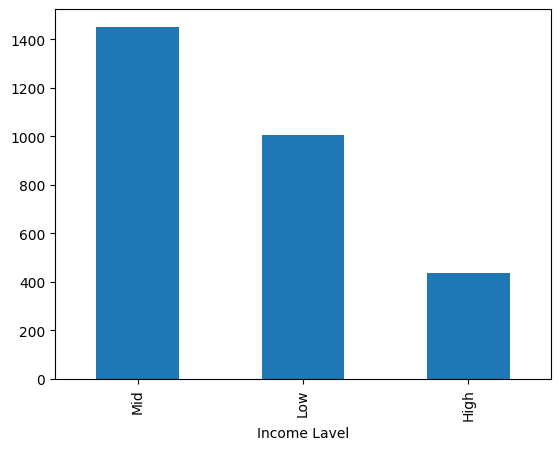

In [39]:
# Creating a income level from the estimated income column

bins = [0, 100000, 300000, float('inf')]
labels = ['Low', 'Mid', 'High']

df['Income Lavel'] = pd.cut(df['Estimated Income'], bins=bins, labels=labels, right=False)
df['Income Lavel'].value_counts().plot(kind='bar')
plt.show()

***More Features Will Be Created in Power BI***

In [40]:
df.head()

,Client ID,Name,Age,Location ID,Joined Bank,Banking Contact,Nationality,Occupation,Fee Structure,Loyalty Classification,Estimated Income,Superannuation Savings,Amount of Credit Cards,Credit Card Balance,Bank Loans,Bank Deposits,Checking Accounts,Saving Accounts,Foreign Currency Account,Business Lending,Properties Owned,Risk Weighting,Gender,Investment Advisor,Banking Relationship,Income Lavel
0,IND81288,Raymond Mills,24,34324,2019-05-06,Anthony Torres,American,Safety Technician IV,High,Jade,75384.77,17677.95,1,484.54,776242.92,1485828.64,603617.88,607332.46,12249.96,1134475.30,1,2,Male,Victor Dean,Retail,Low
1,IND65833,Julia Spencer,23,42205,2001-12-10,Jonathan Hawkins,African,Software Consultant,High,Jade,289834.31,17398.92,1,2256.88,1270615.43,641482.79,229521.37,344635.16,61162.31,2000526.10,1,3,Male,Jeremy Porter,Institutional,Mid
2,IND47499,Stephen Murray,27,7314,2010-01-25,Anthony Berry,European,Help Desk Operator,High,Gold,169935.23,42825.90,2,4568.74,1052715.84,1033401.59,652674.69,203054.35,79071.78,548137.58,1,3,Female,Ernest Knight,Private Bank,Mid
3,IND72498,Virginia Garza,40,34594,2019-03-28,Steve Diaz,American,Geologist II,Mid,Silver,356808.11,5473.15,2,4205.00,121195.06,1048157.49,1048157.49,234685.02,57513.65,1148402.29,0,4,Male,Eric Shaw,Commercial,High
4,IND60181,Melissa Sanders,46,41269,2012-07-20,Shawn Long,American,Assistant Professor,Mid,Platinum,130711.68,48077.60,1,3779.49,1048301.95,487782.53,446644.25,128351.45,30012.14,1674412.12,0,3,Female,Kevin Kim,Retail,Mid


### **EDA**

#### **Univariate Analysis**


For column Nationality



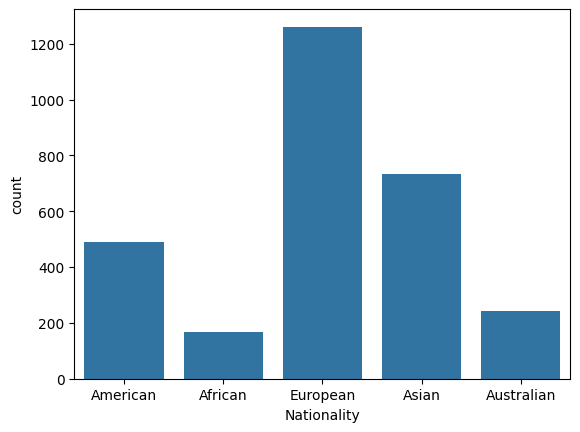


For column Fee Structure



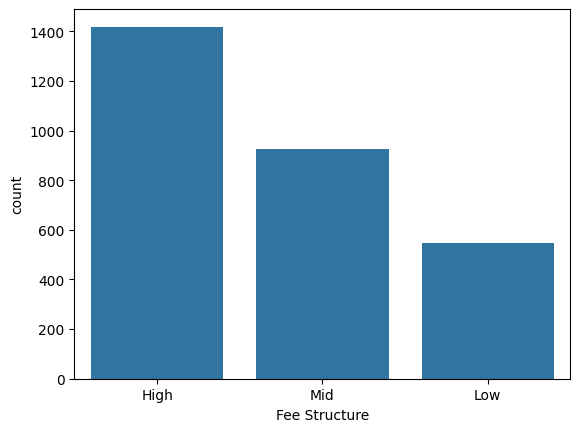


For column Loyalty Classification



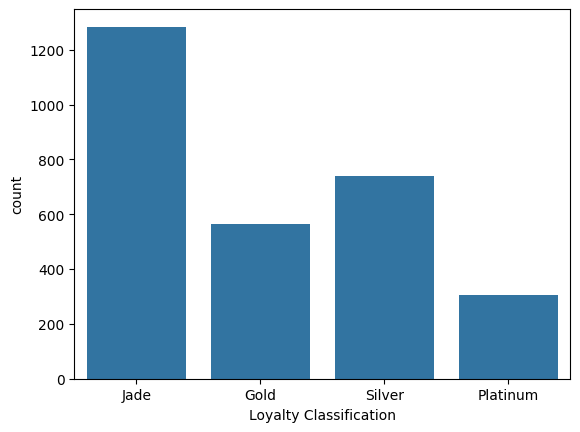


For column Amount of Credit Cards



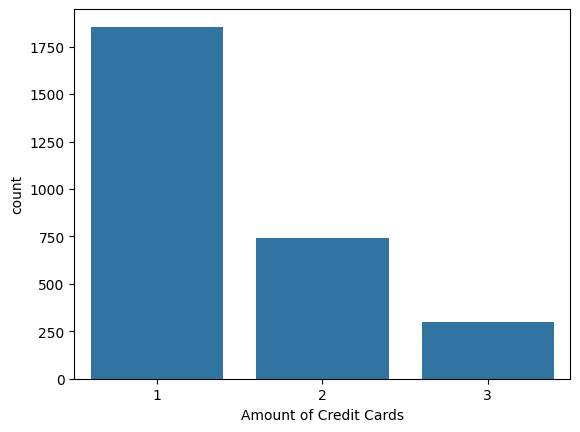


For column Properties Owned



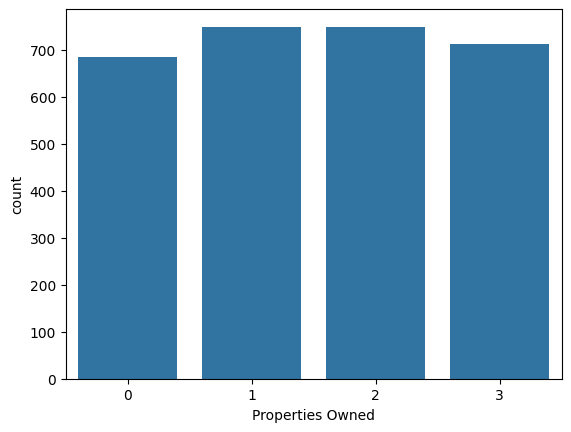


For column Risk Weighting



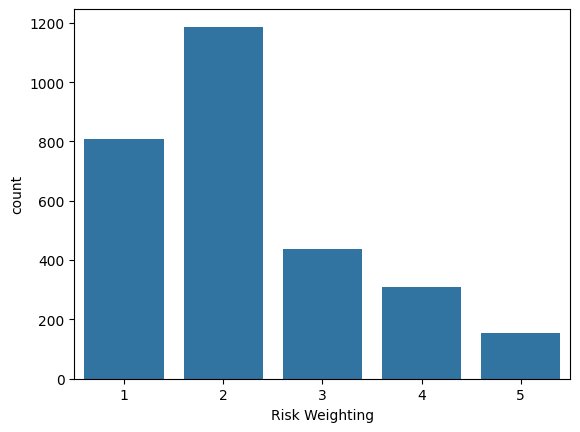


For column Gender



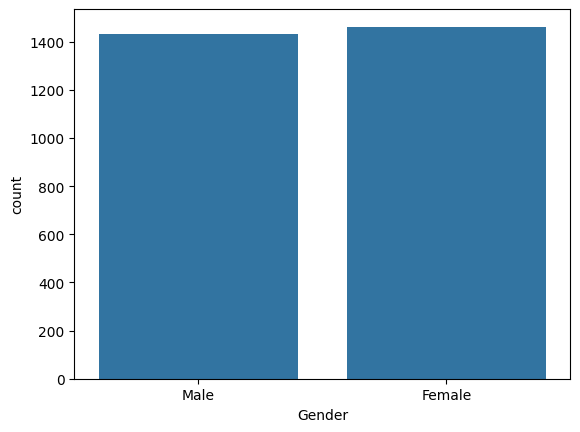


For column Banking Relationship



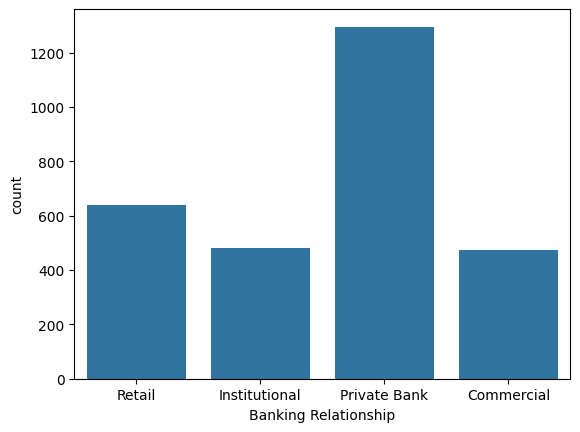


For column Income Lavel



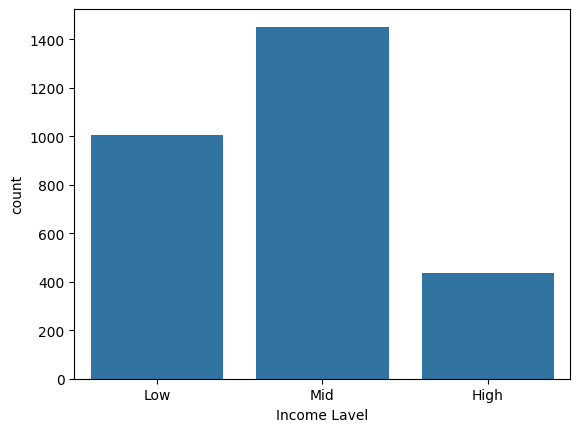

In [41]:
cat_cols = ['Nationality', 'Fee Structure', 'Loyalty Classification', 'Amount of Credit Cards', 'Properties Owned', 'Risk Weighting', 'Gender', 'Banking Relationship', 'Income Lavel']

for i, p in enumerate(df[cat_cols]):
  print(f"\nFor column {p}\n")
  sns.countplot(data=df, x=p)
  plt.show()

In [42]:
len(df['Investment Advisor'].unique())

22

In [43]:
df['Investment Advisor'].value_counts(normalize=True)

Investment Advisor
Daniel Carroll       0.060124
Victor Dean          0.059779
Nicholas Ward        0.059779
Victor Gutierrez     0.059433
Eric Shaw            0.059433
Jeremy Porter        0.059433
Peter Castillo       0.059433
Carl Anderson        0.059088
Lawrence Sanchez     0.058742
Ernest Knight        0.058051
Joe Carroll          0.057706
Steve Sanchez        0.057360
Sean Vasquez         0.030062
Nicholas Morrison    0.029717
Eugene Cunningham    0.029371
Victor Rogers        0.029371
Jack Phillips        0.029371
Kevin Kim            0.029026
Ryan Taylor          0.029026
Juan Ramirez         0.028680
Gregory Boyd         0.028680
Fred Bryant          0.028334
Name: proportion, dtype: float64

In [44]:
df.head(3)

,Client ID,Name,Age,Location ID,Joined Bank,Banking Contact,Nationality,Occupation,Fee Structure,Loyalty Classification,Estimated Income,Superannuation Savings,Amount of Credit Cards,Credit Card Balance,Bank Loans,Bank Deposits,Checking Accounts,Saving Accounts,Foreign Currency Account,Business Lending,Properties Owned,Risk Weighting,Gender,Investment Advisor,Banking Relationship,Income Lavel
0,IND81288,Raymond Mills,24,34324,2019-05-06,Anthony Torres,American,Safety Technician IV,High,Jade,75384.77,17677.95,1,484.54,776242.92,1485828.64,603617.88,607332.46,12249.96,1134475.30,1,2,Male,Victor Dean,Retail,Low
1,IND65833,Julia Spencer,23,42205,2001-12-10,Jonathan Hawkins,African,Software Consultant,High,Jade,289834.31,17398.92,1,2256.88,1270615.43,641482.79,229521.37,344635.16,61162.31,2000526.10,1,3,Male,Jeremy Porter,Institutional,Mid
2,IND47499,Stephen Murray,27,7314,2010-01-25,Anthony Berry,European,Help Desk Operator,High,Gold,169935.23,42825.90,2,4568.74,1052715.84,1033401.59,652674.69,203054.35,79071.78,548137.58,1,3,Female,Ernest Knight,Private Bank,Mid


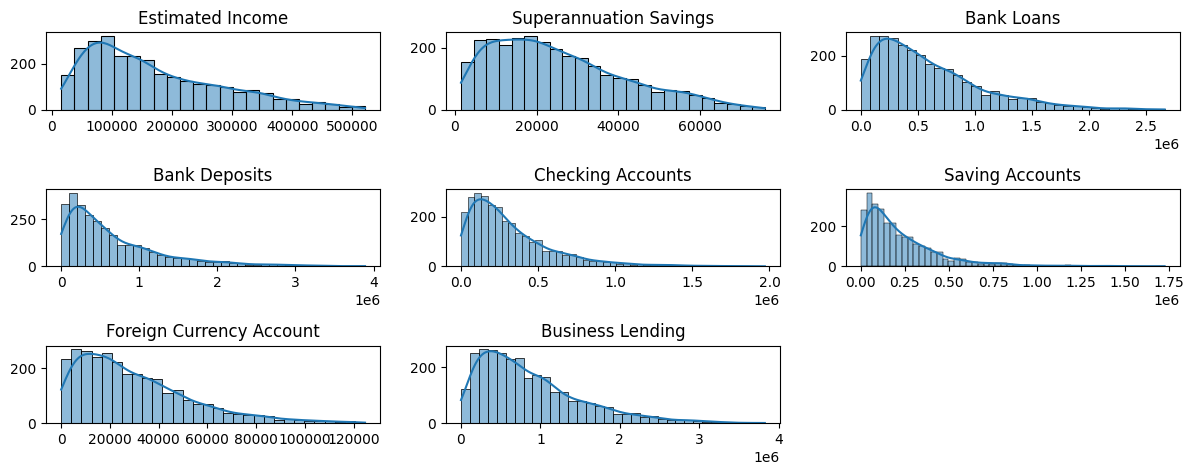

In [45]:
num_cols = ['Estimated Income', 'Superannuation Savings', 'Bank Loans', 'Bank Deposits', 'Checking Accounts', 'Saving Accounts', 'Foreign Currency Account', 'Business Lending']

plt.figure(figsize=(12, 6))

for i, col in enumerate(num_cols):
  plt.subplot(4, 3, i+1)
  sns.histplot(df[col], kde=True)
  plt.title(col)
  plt.ylabel('')
  plt.xlabel('')

plt.tight_layout()
plt.show()

#### **Bivariate Analysis**


For column Nationality



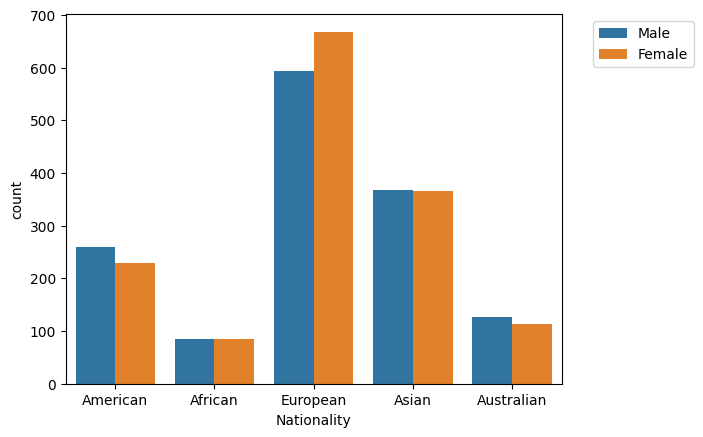


For column Fee Structure



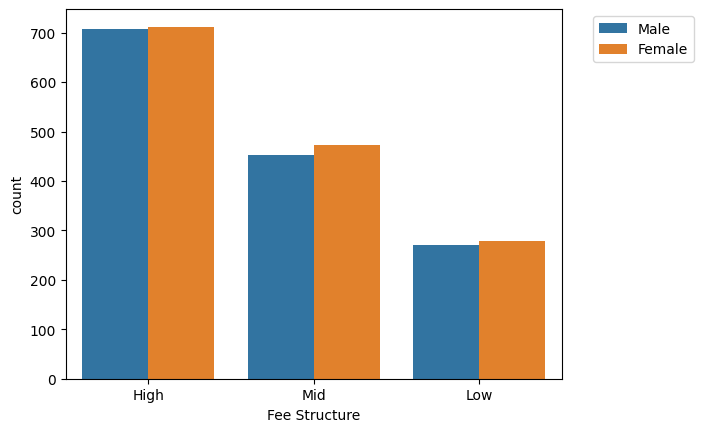


For column Loyalty Classification



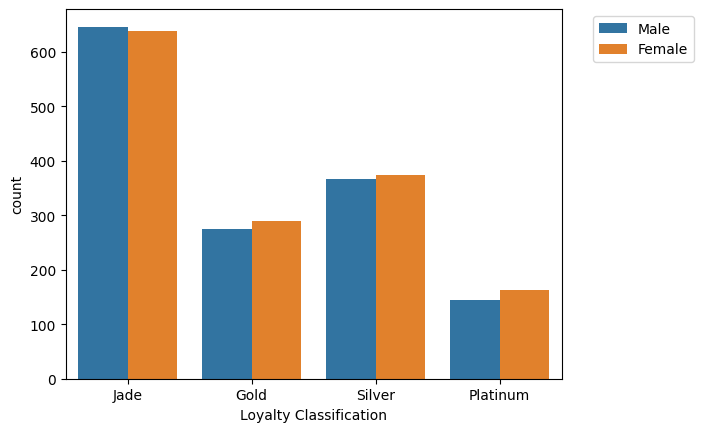


For column Amount of Credit Cards



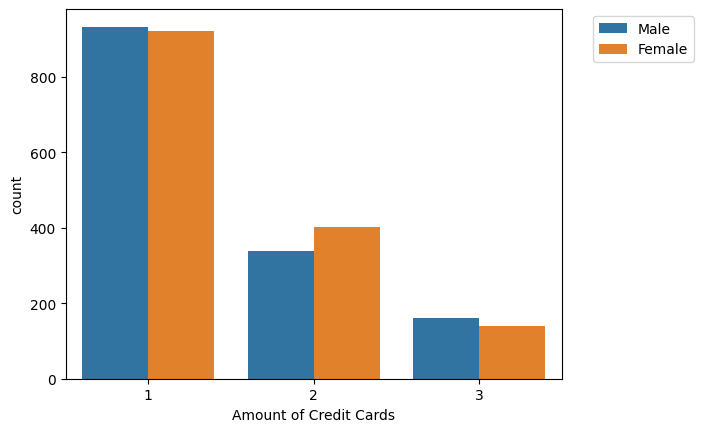


For column Properties Owned



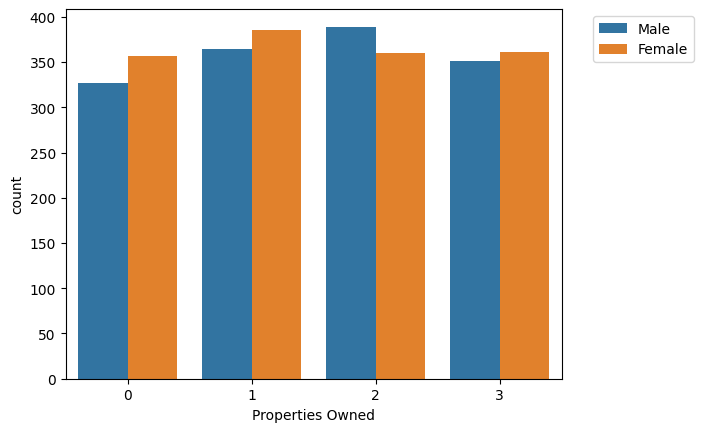


For column Risk Weighting



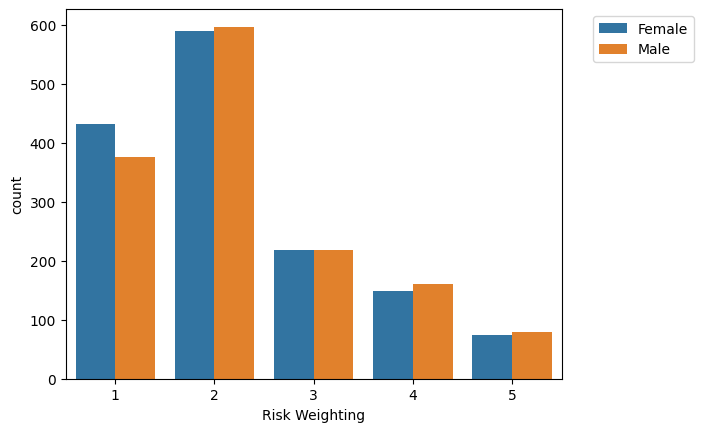


For column Banking Relationship



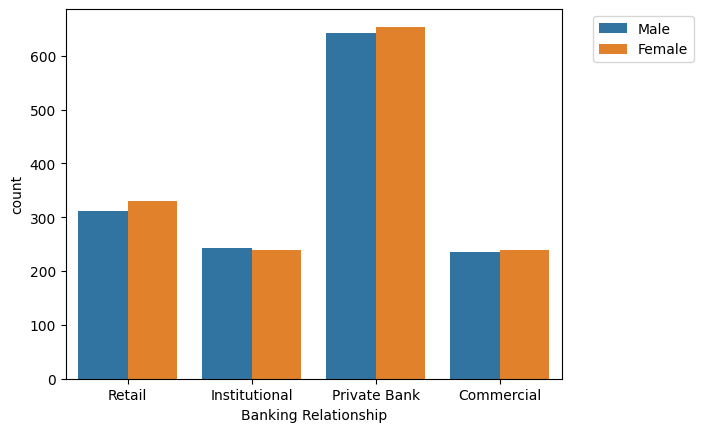


For column Income Lavel



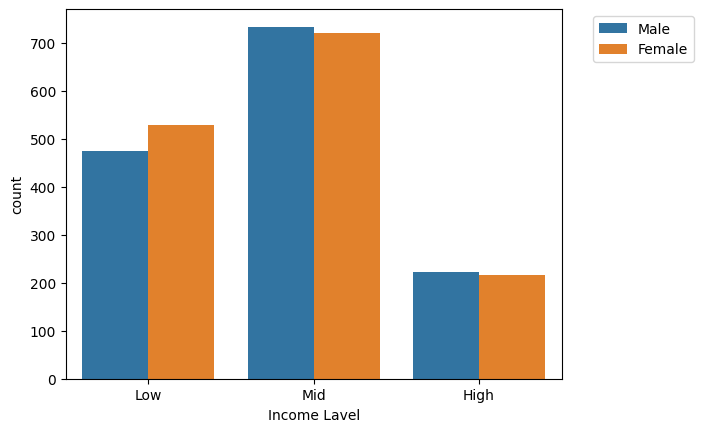

In [48]:
cat_cols = ['Nationality', 'Fee Structure', 'Loyalty Classification', 'Amount of Credit Cards', 'Properties Owned', 'Risk Weighting', 'Banking Relationship', 'Income Lavel']

for i, p in enumerate(df[cat_cols]):
  print(f"\nFor column {p}\n")
  sns.countplot(data=df, x=p, hue='Gender')
  plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
  plt.show()


For column Gender



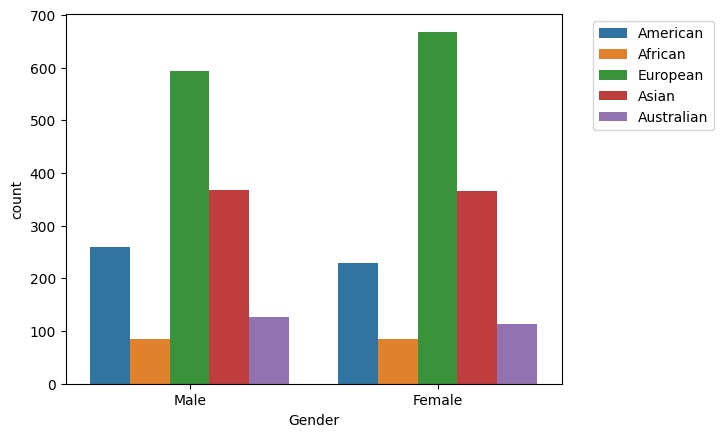


For column Fee Structure



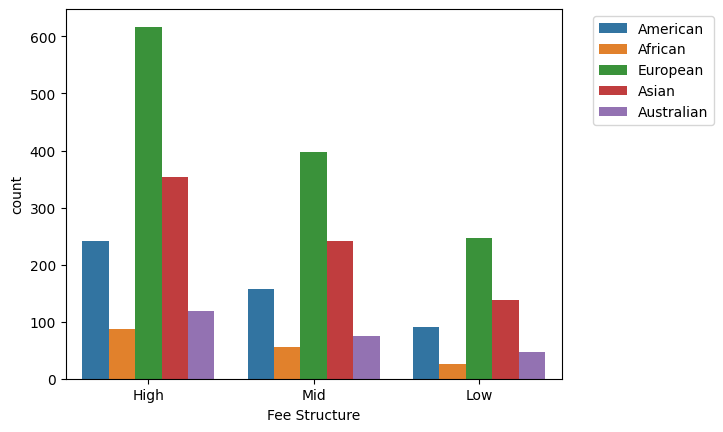


For column Loyalty Classification



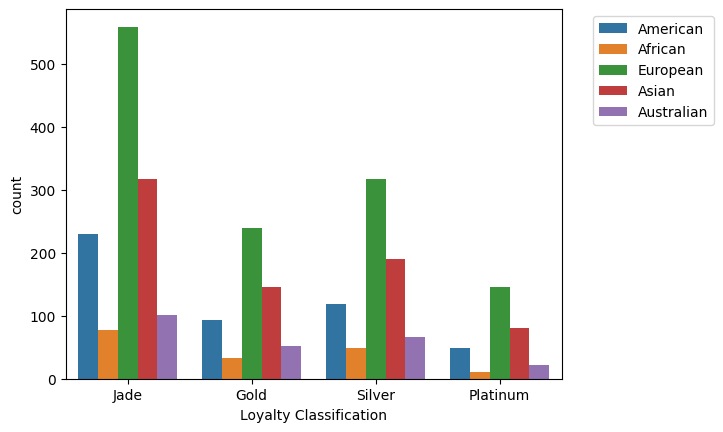


For column Amount of Credit Cards



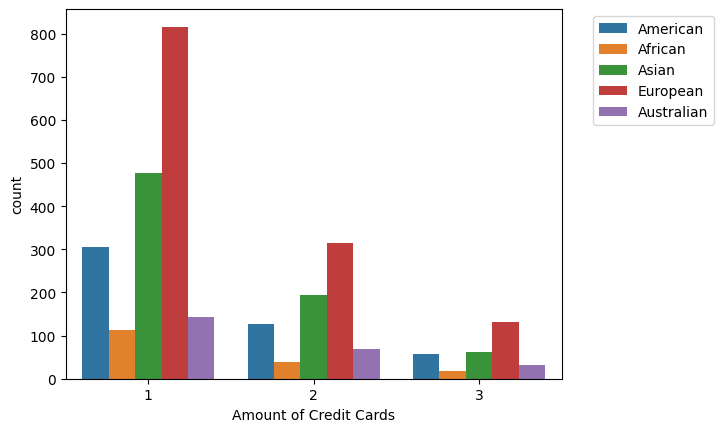


For column Properties Owned



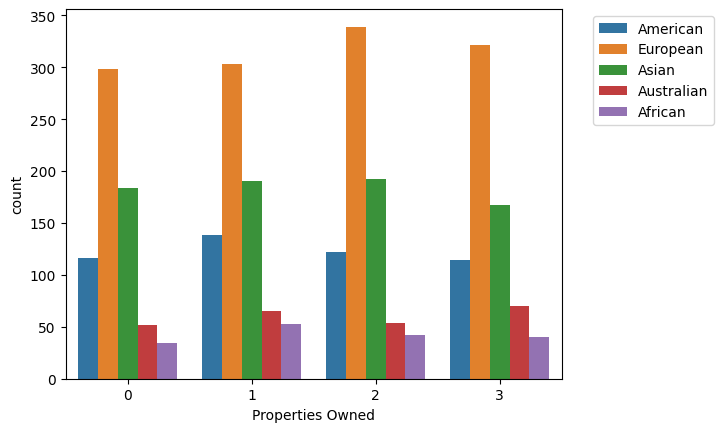


For column Risk Weighting



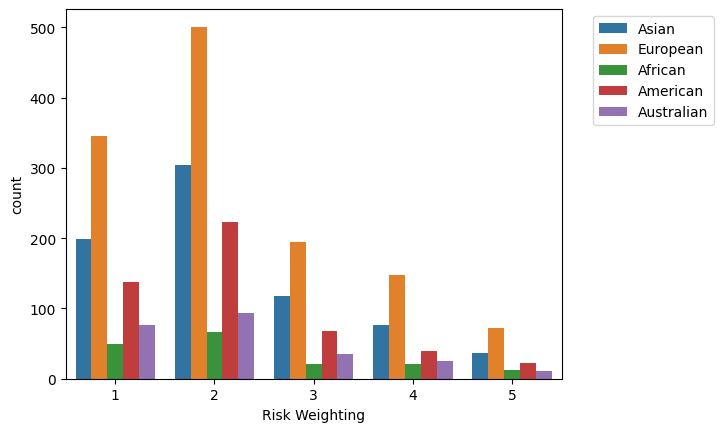


For column Banking Relationship



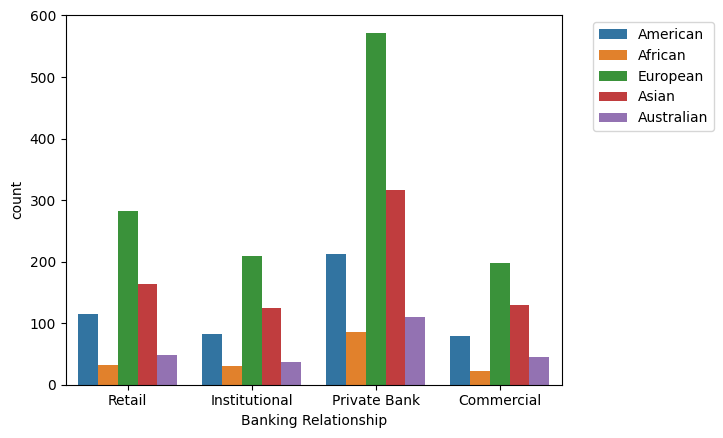


For column Income Lavel



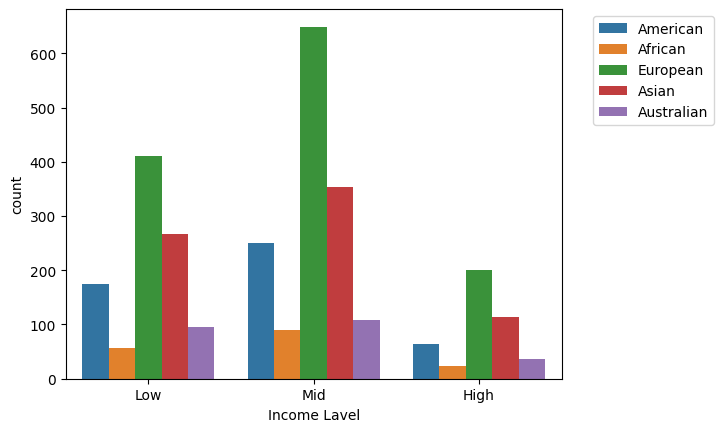

In [49]:
cat_cols = ['Gender','Fee Structure', 'Loyalty Classification', 'Amount of Credit Cards', 'Properties Owned', 'Risk Weighting', 'Banking Relationship', 'Income Lavel']

for i, p in enumerate(df[cat_cols]):
  print(f"\nFor column {p}\n")
  sns.countplot(data=df, x=p, hue='Nationality')
  plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
  plt.show()

#### **Relationship Trends**

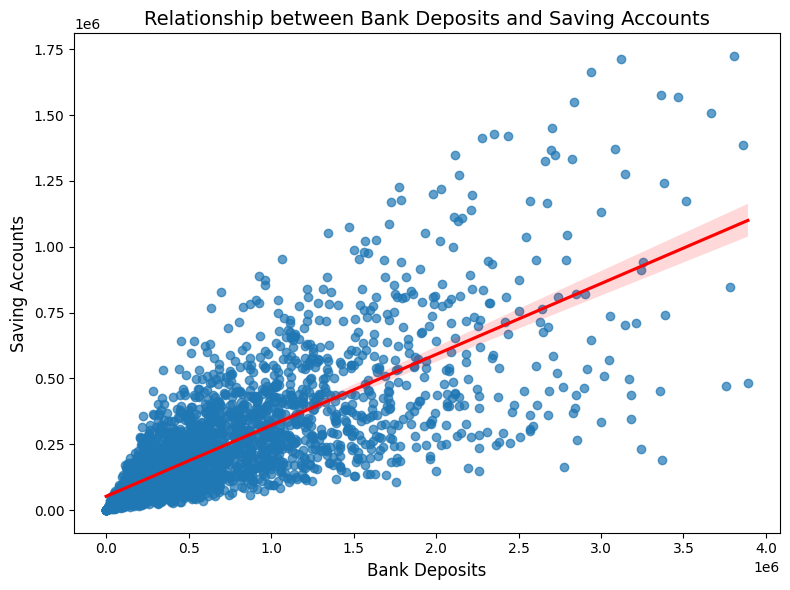

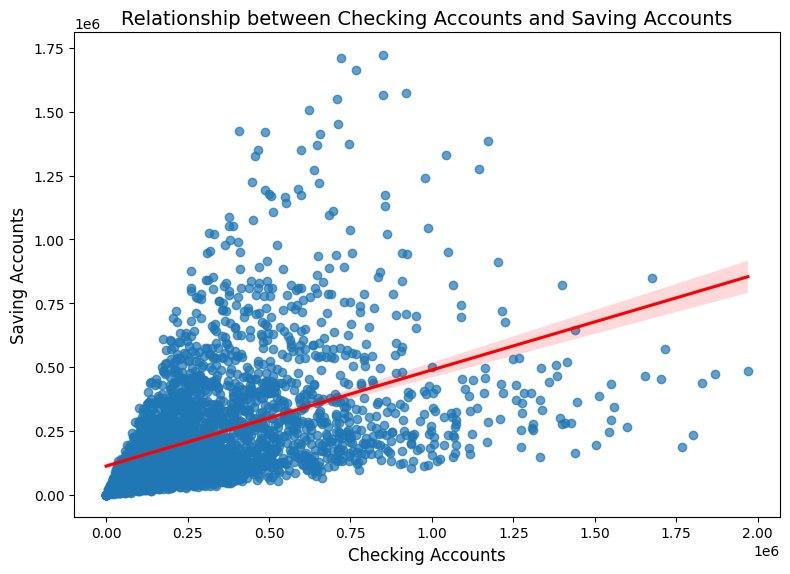

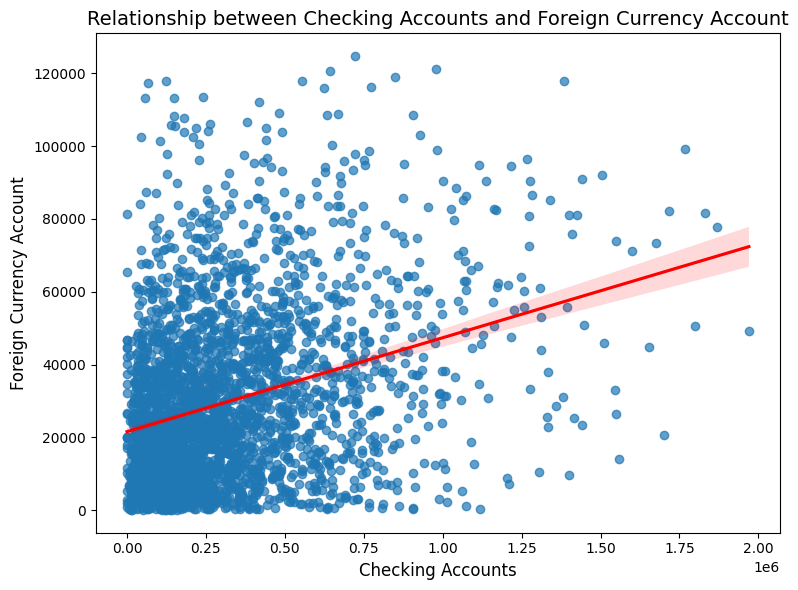

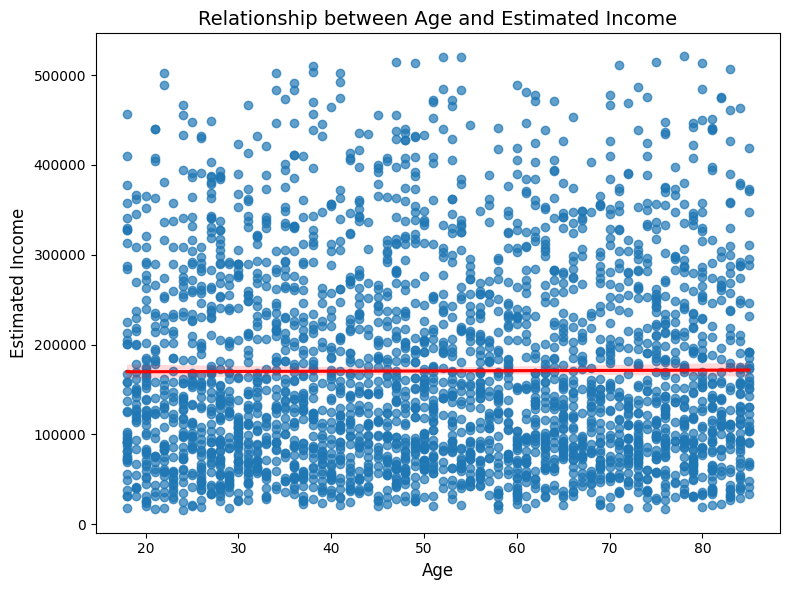

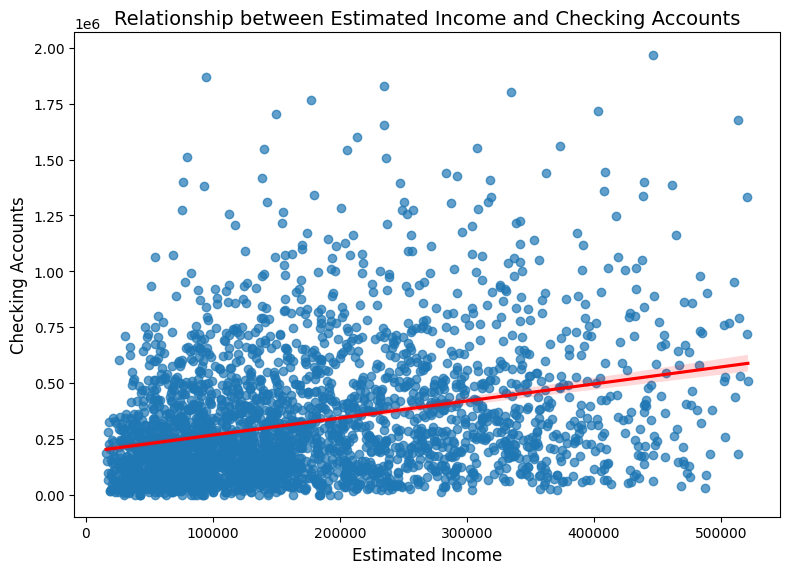

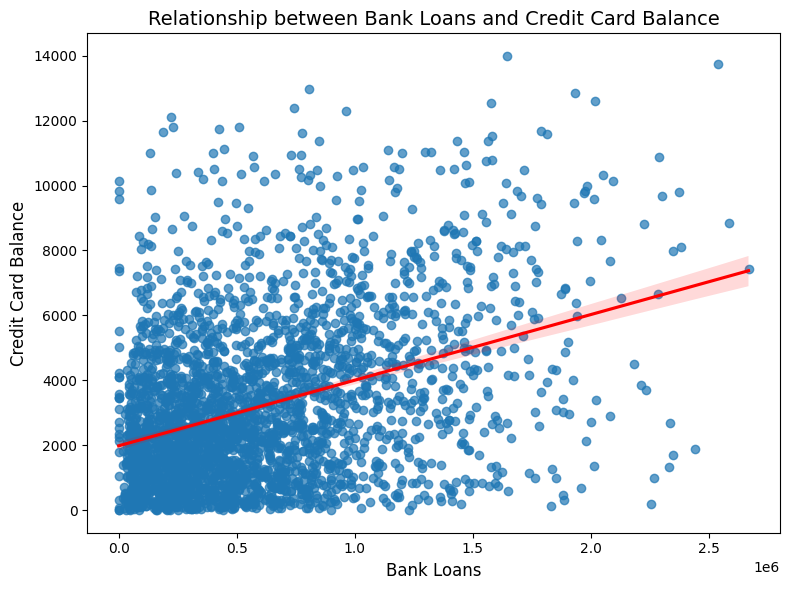

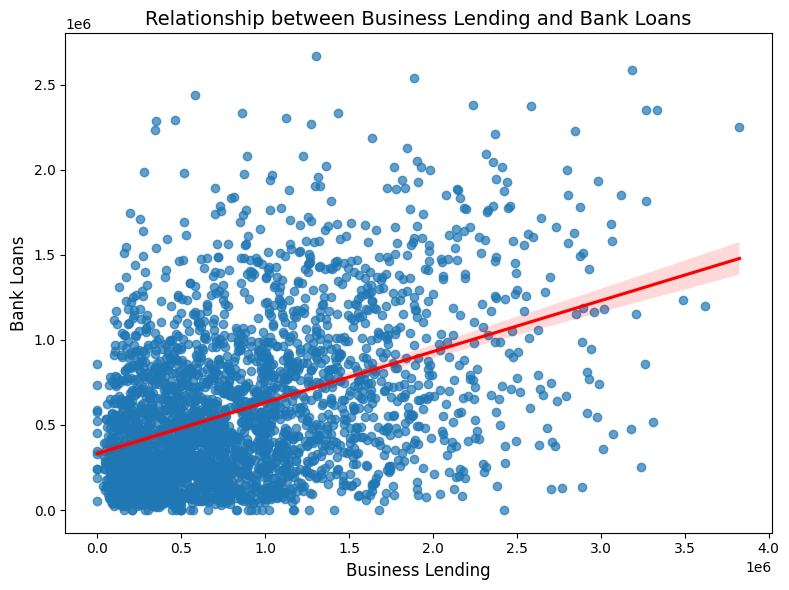

In [52]:
pairs_to_plot = [
  ('Bank Deposits', 'Saving Accounts'),
  ('Checking Accounts', 'Saving Accounts'),
  ('Checking Accounts', 'Foreign Currency Account'),
  ('Age', 'Estimated Income'),
  ('Estimated Income', 'Checking Accounts'),
  ('Bank Loans', 'Credit Card Balance'),
  ('Business Lending', 'Bank Loans')
]


for x, y in pairs_to_plot:
  plt.figure(figsize=(8, 6))
  sns.regplot(
    data=df,
    x=x,
    y=y,
    scatter_kws={'alpha': 0.7},     # semi-transparent points
    line_kws={'color': 'red'}       # best-fit line color
  )
  plt.title(f'Relationship between {x} and {y}', fontsize=14)
  plt.xlabel(x, fontsize=12)
  plt.ylabel(y, fontsize=12)
  plt.tight_layout()
  plt.show()

#### **Heatmap**

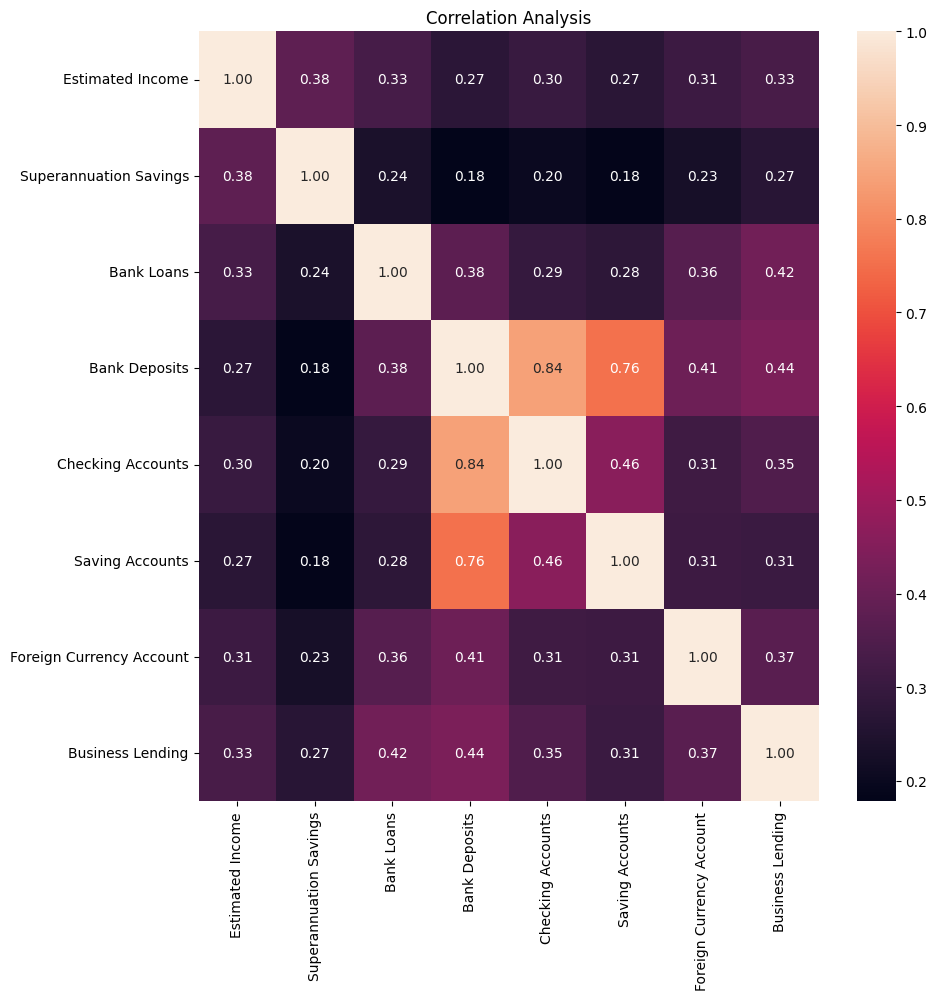

In [53]:
plt.figure(figsize=(10, 10))
sns.heatmap(df[num_cols].corr(), annot=True, fmt='.2f')
plt.title('Correlation Analysis')
plt.show()

In [55]:
df.shape

(2894, 26)

In [54]:
# Write DataFrame to MySQL (replace 'your_table_name' with your actual table)
df.to_sql(name='banking_data_updated', con=engine, if_exists='replace', index=False)

print("Data pushed successfully to MySQL!")

Data pushed successfully to MySQL!
